# Data Wrangling and Visualization - WeRateDogs Twitter account

## Import the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import os
import tweepy
import json
%matplotlib inline

## Gathering Data

Data is gathered from three different sources: Twitter archive (downloading the csv file manually), tweet image predictions (downloading the tsv file programmatically using Python's Requests library) and data scraped using the Twitter API using Python's Tweepy library . Each data is in a different file format. Each piece of data is imported into a separate pandas DataFrame at first.

### i) Data from Twitter archive - manually downloading csv file

In [6]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### ii) Data from twitt image predictions file - programmatically downloading tsv file

In [8]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
# Getting the data from the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [10]:
# Writing the data to a file
with open (os.path.join(folder_name,url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)

In [11]:
os.listdir('image_predictions')

['image-predictions.tsv']

In [12]:
df_predictions = pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')

In [13]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### iii) Data scraped using the Twitter API - using Python's Tweepy library

In [104]:
consumer_key = 'XXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXX'
access_token = 'XXXXXXXXXXX'
access_secret = 'XXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [15]:
tweet_id = df_archive.tweet_id
len(tweet_id)

2356

In [17]:
working_ids=[]
nonworking_ids=[]

In [18]:
with open ('tweet_json.txt','w') as outfile:
    for tweet_id in tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json,outfile)
            outfile.write('\n')
            working_ids.append(tweet_id)
        except:
            print ("Error for: " + str(tweet_id))
            nonworking_ids.append(tweet_id)

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968


Rate limit reached. Sleeping for: 541


Error for: 758740312047005698
Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 541


Error for: 676957860086095872


In [138]:
working_ids

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046086144,
 882992080364

In [139]:
len(working_ids)

2338

In [90]:
nonworking_ids

[888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 758740312047005698,
 754011816964026368,
 680055455951884288,
 676957860086095872]

In [19]:
len(nonworking_ids)

18

In [20]:
df_tweetdata = pd.read_json('tweet_json.txt',lines=True)

In [21]:
df_tweetdata.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37950,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8291,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32588,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6123,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24536,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4054,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41291,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8428,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39478,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9130,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data

After gathering the data, the next step is to assess the data visually and programmatically for quality and tidiness issues. We assess each of the three dataframes: df_archive, df_predictions and df_tweetdata, detect the issues and document them.



In [22]:
# display the df_archive dataframe
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [23]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [97]:
# display the df_predictions dataframe
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
# display the df_tweetdata dataframe
df_tweetdata

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37950,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8291,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32588,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6123,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24536,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4054,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41291,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8428,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39478,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9130,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19839,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,3039,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11599,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,2010,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",64022,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,18389,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27250,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4176,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31269,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,7192,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [28]:
df_tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2338 non-null datetime64[ns]
display_text_range               2338 non-null object
entities                         2338 non-null object
extended_entities                2065 non-null object
favorite_count                   2338 non-null int64
favorited                        2338 non-null bool
full_text                        2338 non-null object
geo                              0 non-null float64
id                               2338 non-null int64
id_str                           2338 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [29]:
columns_of_interest = ['id','retweet_count','retweeted','retweeted_status','favorite_count']
df_tweetdata = df_tweetdata[columns_of_interest]

In [30]:
df_tweetdata.head()

,id,retweet_count,retweeted,retweeted_status,favorite_count
0,892420643555336193,8291,False,NaN,37950
1,892177421306343426,6123,False,NaN,32588
2,891815181378084864,4054,False,NaN,24536
3,891689557279858688,8428,False,NaN,41291
4,891327558926688256,9130,False,NaN,39478


In [31]:
df_tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 5 columns):
id                  2338 non-null int64
retweet_count       2338 non-null int64
retweeted           2338 non-null bool
retweeted_status    167 non-null object
favorite_count      2338 non-null int64
dtypes: bool(1), int64(3), object(1)
memory usage: 75.4+ KB


In [32]:
df_tweetdata.describe()

,id,retweet_count,favorite_count
count,2.338000e+03,2338.000000,2338.000000
mean,7.422385e+17,2920.497861,7946.362703
std,6.834068e+16,4919.812857,12308.340561
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,584.250000,1368.750000
50%,7.186224e+17,1362.000000,3453.500000
75%,7.986971e+17,3401.250000,9721.000000
max,8.924206e+17,83352.000000,163892.000000


In [33]:
# check the 'name' column in the df_archive table for any 'None' values.
df_archive[df_archive['name']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [34]:
# check the 'expanded_urls' column in the df_archive table for any 'None' values to identify the records without photos.
df_archive[df_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [35]:
#checking the rating_numerator column for outliers for values less than 10 or greater than 20
df_archive[(df_archive.rating_numerator > 20) | (df_archive.rating_numerator < 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [36]:
#checking the rating_denominator column for outliers with values less than 5 or greater than 15
df_archive[(df_archive.rating_denominator > 15) | (df_archive.rating_denominator < 5)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [37]:
#identify retweets from df_archive
df_archive[df_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [38]:
#identify reply tweets from df_archive
df_archive[df_archive['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [39]:
#check the values in the source column
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [40]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality 

1. The following columns have incorrect data types:
    df_archive table: tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id. These have numeric values(int/float) instead of string type. The 'timestamp' and 'retweeted_status_timestamp' columns have datatype 'string' instead of 'datetime'.
    df_predictions table: incorrect data types: tweet_id (int instead of string)
    df_tweetdata table: incorrect data types: tweet_id (int instead of string)
    
2. The date and time information is contained in a single column.
    
3. The 'name' column in df_archive table has several 'None' or incorrect values.

4. The 'expanded_urls' column in df_archive table has several 'None' values (no images present).

5. The 'rating_denominator' column in df_archive table has several incorrect values, including 0.

6. The df_archive and df_tweetdata tables contain retweets and replies.

7. The 'source' column in df_archive table has information that is difficult to read and comprehend.

8. The 'text' column in df_archive is truncated, so the full information in this column cannot be read.

9. The name of the 'id' column in the df_tweetdata table is inconsistent with the column name 'tweet_id' in the other two dataframes.



### Tidiness

1. There are 4 different columns for dog stage instead of a single column.

2. The columns not relevant for our analysis may be removed.

2. The three datasets can be merged into a single dataset according to the rules of tidy data.

## Cleaning Data

In [41]:
# Make copies of the original datasets
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_tweetdata_clean = df_tweetdata.copy()

We now start cleaning the data to address the quality and tidiness issues identified above.

#### Define

Rename the 'id' column in the df_tweetdata_clean to 'tweet_id' for consistency with the other two dataframes

#### Code

In [42]:
# rename column 'id' to 'tweet_id' in df_tweetdata_clean
df_tweetdata_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [43]:
df_tweetdata_clean.head()

,tweet_id,retweet_count,retweeted,retweeted_status,favorite_count
0,892420643555336193,8291,False,NaN,37950
1,892177421306343426,6123,False,NaN,32588
2,891815181378084864,4054,False,NaN,24536
3,891689557279858688,8428,False,NaN,41291
4,891327558926688256,9130,False,NaN,39478


#### Define

 Merge the three datasets into a single dataset according to the rules of tidy data.

#### Code

In [44]:
df_final = pd.merge(df_archive_clean, df_predictions_clean, on = 'tweet_id', how = 'inner')
df_final = pd.merge(df_final, df_tweetdata_clean, on = 'tweet_id', how = 'inner')

#### Test

In [45]:
df_final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,retweeted,retweeted_status,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8291,False,NaN,37950
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6123,False,NaN,32588
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4054,False,NaN,24536
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8428,False,NaN,41291
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9130,False,NaN,39478


In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 32 columns):
tweet_id                      2065 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2065 non-null object
source                        2065 non-null object
text                          2065 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2065 non-null object
rating_numerator              2065 non-null int64
rating_denominator            2065 non-null int64
name                          2065 non-null object
doggo                         2065 non-null object
floofer                       2065 non-null object
pupper                        2065 non-null object
puppo                         2065 non-null object
jpg_url                       2065 

#### Define

Merge the 4 different columns for dog stage to a single column.

#### Code

In [47]:
# merge the columns 'doggo', 'floofer', 'pupper', 'puppo' into a single column called 'stage'
df_final['stage'] = df_final[df_final.columns[13:17]].apply(
    lambda x: ','.join(x.astype(str)),
    axis=1
)

In [48]:
df_final['stage'].value_counts()

None,None,None,None        1744
None,None,pupper,None       211
doggo,None,None,None         67
None,None,None,puppo         23
doggo,None,pupper,None       11
None,floofer,None,None        7
doggo,None,None,puppo         1
doggo,floofer,None,None       1
Name: stage, dtype: int64

In [49]:
#replace the column values as seen from the above value_counts results by removing multiple 'None' values
df_final['stage']
replace_dict = dict([
        ('None,None,None,None', 'None'), ('None,None,pupper,None', 'pupper'), ('doggo,None,None,None', 'doggo'),
    ('None,None,None,puppo', 'puppo'), ('doggo,None,pupper,None', 'doggo,pupper'), ('None,floofer,None,None', 'floofer'),
    ('doggo,None,None,puppo', 'doggo,puppo'), ('doggo,floofer,None,None', 'floofer')
    ])

df_final=df_final.replace(replace_dict, regex=True)

# delete the separate dog stage columns from the dataset
columns_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
df_final = df_final.drop(columns_to_drop, axis=1)

#set the datatype of the 'stage' column as category 
df_final['stage'] = df_final.stage.astype('category')

#### Test

In [50]:
df_final.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,retweeted,retweeted_status,favorite_count,stage
722,759197388317847553,NaN,NaN,2016-07-30 01:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. She's just heckin precious af I ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759197388...,...,0.076899,True,white_wolf,0.063269,False,2097,False,NaN,6383,None
1028,712065007010385924,NaN,NaN,2016-03-21 23:55:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's clearly in charge of the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712065007...,...,0.084253,False,pizza,0.080168,False,662,False,NaN,2353,None
330,822462944365645825,NaN,NaN,2017-01-20 15:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822462944...,...,0.023056,True,Maltese_dog,0.008945,True,15884,False,NaN,30137,pupper
1480,678991772295516161,NaN,NaN,2015-12-21 17:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If your Monday isn't going so well just take a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678991772...,...,0.187003,True,Chihuahua,0.101420,True,1251,False,NaN,2420,None
1628,674410619106390016,NaN,NaN,2015-12-09 02:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He wants to be a sprinkler. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674410619...,...,0.046475,False,beagle,0.019427,True,482,False,NaN,1225,None


In [51]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 29 columns):
tweet_id                      2065 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2065 non-null object
source                        2065 non-null object
text                          2065 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2065 non-null object
rating_numerator              2065 non-null int64
rating_denominator            2065 non-null int64
name                          2065 non-null object
jpg_url                       2065 non-null object
img_num                       2065 non-null int64
p1                            2065 non-null object
p1_conf                       2065 non-null float64
p1_dog                        2065 

#### Define

Convert the incorrect datatypes into strings for the following columns

#### Code

In [52]:
df_final['tweet_id']=df_final['tweet_id'].astype(str)
df_final['in_reply_to_status_id']=df_final['in_reply_to_status_id'].astype(str)
df_final['in_reply_to_user_id']=df_final['in_reply_to_user_id'].astype(str)
df_final['retweeted_status_id']=df_final['retweeted_status_id'].astype(str)
df_final['retweeted_status_user_id']=df_final['retweeted_status_user_id'].astype(str)

#### Test

In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 29 columns):
tweet_id                      2065 non-null object
in_reply_to_status_id         2065 non-null object
in_reply_to_user_id           2065 non-null object
timestamp                     2065 non-null object
source                        2065 non-null object
text                          2065 non-null object
retweeted_status_id           2065 non-null object
retweeted_status_user_id      2065 non-null object
retweeted_status_timestamp    75 non-null object
expanded_urls                 2065 non-null object
rating_numerator              2065 non-null int64
rating_denominator            2065 non-null int64
name                          2065 non-null object
jpg_url                       2065 non-null object
img_num                       2065 non-null int64
p1                            2065 non-null object
p1_conf                       2065 non-null float64
p1_dog                        

#### Define

Convert the 'timestamp' and 'retweeted_status_timestamp' columns into datetime datatypes, and split into two separate columns for date and time.

#### Code

In [54]:
from datetime import datetime

#convert datatypes to datetime
date_time = pd.to_datetime(df_final.timestamp, errors='coerce')
retweet_date_time = pd.to_datetime(df_final.retweeted_status_timestamp, errors='coerce')

#split each column into separate date and time columns
df_final = df_final.assign(tweet_date=date_time.dt.date, tweet_time=date_time.dt.time)
df_final = df_final.assign(retweeted_status_date=retweet_date_time.dt.date, retweeted_status_time=retweet_date_time.dt.time)

#delete the original columns
datecolumns_to_drop=['timestamp','retweeted_status_timestamp']
df_final = df_final.drop(datecolumns_to_drop, axis=1)

#### Test

In [56]:
df_final.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,...,p3_dog,retweet_count,retweeted,retweeted_status,favorite_count,stage,tweet_date,tweet_time,retweeted_status_date,retweeted_status_time
573,783347506784731136,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kenny. He just wants to...,6.742918370630533e+17,4196983835.0,https://twitter.com/dog_rates/status/674291837...,11,10,...,True,6102,False,{'created_at': 'Tue Dec 08 18:17:56 +0000 2015...,0,None,2016-10-04,16:46:14,2015-12-08,18:17:56
162,852912242202992640,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benny. He likes being adorable and making...,nan,nan,"https://www.gofundme.com/bennys-medical-bills,...",12,10,...,True,1908,False,NaN,9271,None,2017-04-14,15:51:39,NaT,NaT
1210,696754882863349760,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Reptar. He specifically asked for his ...,nan,nan,https://twitter.com/dog_rates/status/696754882...,10,10,...,True,377,False,NaN,1543,None,2016-02-08,17:58:03,NaT,NaT
224,839239871831150596,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He's big. 13/10 would attempt to...,nan,nan,https://twitter.com/dog_rates/status/839239871...,13,10,...,True,6969,False,NaN,28400,None,2017-03-07,22:22:32,NaT,NaT
1119,704761120771465216,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,nan,nan,https://twitter.com/dog_rates/status/704761120...,13,10,...,True,3074,False,NaN,6913,pupper,2016-03-01,20:11:59,NaT,NaT


#### Define

Remove the retweets from the dataset

#### Code

In [57]:
df_final = df_final[df_final['retweeted_status_id']=='nan']

#### Test

In [58]:
df_final['retweeted_status_id'].value_counts()

nan    1990
Name: retweeted_status_id, dtype: int64

#### Define

Remove the reply tweets from the dataset

#### Code

In [59]:
df_final = df_final[df_final['in_reply_to_status_id']=='nan']

#### Test

In [60]:
df_final['in_reply_to_status_id'].value_counts()

nan    1967
Name: in_reply_to_status_id, dtype: int64

In [473]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2064
Data columns (total 31 columns):
tweet_id                    1967 non-null object
in_reply_to_status_id       1967 non-null object
in_reply_to_user_id         1967 non-null object
source                      1967 non-null object
text                        1967 non-null object
retweeted_status_id         1967 non-null object
retweeted_status_user_id    1967 non-null object
expanded_urls               1967 non-null object
rating_numerator            1967 non-null int64
rating_denominator          1967 non-null int64
name                        1967 non-null object
jpg_url                     1967 non-null object
img_num                     1967 non-null int64
p1                          1967 non-null object
p1_conf                     1967 non-null float64
p1_dog                      1967 non-null bool
p2                          1967 non-null object
p2_conf                     1967 non-null float64
p2_dog        

#### Define

Check and remove the following columns as they do not contain any relevant information for our analysis: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status, retweeted_status_date,retweeted, retweeted_status_time

#### Code

In [61]:
df_final['in_reply_to_status_id'].value_counts()

nan    1967
Name: in_reply_to_status_id, dtype: int64

In [62]:
df_final['in_reply_to_user_id'].value_counts()

nan    1967
Name: in_reply_to_user_id, dtype: int64

In [484]:
df_final['retweeted'].value_counts()

False    1967
Name: retweeted, dtype: int64

In [477]:
df_final['retweeted_status_id'].value_counts()

nan    1967
Name: retweeted_status_id, dtype: int64

In [478]:
df_final['retweeted_status_user_id'].value_counts()

nan    1967
Name: retweeted_status_user_id, dtype: int64

In [479]:
df_final['retweeted_status'].value_counts()

Series([], Name: retweeted_status, dtype: int64)

In [480]:
df_final['retweeted_status_date'].value_counts()

Series([], Name: retweeted_status_date, dtype: int64)

In [481]:
df_final['retweeted_status_time'].value_counts()

Series([], Name: retweeted_status_time, dtype: int64)

In [63]:
columns_to_be_dropped = ['in_reply_to_status_id','in_reply_to_user_id','retweeted','retweeted_status_id','retweeted_status_user_id','retweeted_status','retweeted_status_date','retweeted_status_time','img_num']
df_final = df_final.drop(columns_to_be_dropped, axis=1)

#### Test

In [64]:
df_final.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,tweet_date,tweet_time
182,848324959059550208,"<a href=""http://twitter.com/download/iphone"" r...",Meet Odin. He's supposed to be giving directio...,https://twitter.com/dog_rates/status/848324959...,12,10,Odin,https://pbs.twimg.com/media/C8XbDR1WAAAxND8.jpg,malamute,0.544576,...,0.290268,True,Eskimo_dog,0.154421,True,4824,25537,None,2017-04-02,00:03:26
1719,672272411274932228,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippin. He is terrified of his new lit...,https://twitter.com/dog_rates/status/672272411...,11,10,Pippin,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,pug,0.914685,...,0.014982,True,Siamese_cat,0.009221,False,3478,6538,None,2015-12-03,04:33:27
1982,667491009379606528,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088,...,0.132264,False,weasel,0.005730,False,231,533,None,2015-11-19,23:53:52
1840,670319130621435904,"<a href=""http://twitter.com/download/iphone"" r...",AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,https://twitter.com/dog_rates/status/670319130...,11,10,None,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,Irish_terrier,0.254856,...,0.227716,True,soft-coated_wheaten_terrier,0.223263,True,1247,3905,None,2015-11-27,19:11:49
90,871762521631449091,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,https://twitter.com/dog_rates/status/871762521...,12,10,Rover,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,Labrador_retriever,0.921393,...,0.064608,True,bloodhound,0.003383,True,3438,19985,pupper,2017-06-05,16:15:56


#### Define

Convert the source column into readable text

In [65]:
df_final['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1929
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

#### Code

In [66]:
replace_source_dict = dict([
        ('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone'), ('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Web Client'), ('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')
    ])
df_final=df_final.replace(replace_source_dict)

#### Test

In [67]:
df_final.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,tweet_date,tweet_time
48,881906580714921986,Twitter for iPhone,This is Rey. He's a Benebop Cumberfloof. 12/10...,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,Weimaraner,0.291539,...,0.278966,True,koala,0.127017,False,3315,23822,None,2017-07-03,16:04:48
361,817827839487737858,Twitter for iPhone,This is Buddy. He ran into a glass door once. ...,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,https://pbs.twimg.com/ext_tw_video_thumb/81782...,cocker_spaniel,0.387608,...,0.264844,True,Pekinese,0.122123,True,29567,55035,None,2017-01-07,20:18:46
1448,680221482581123072,Twitter for iPhone,This is CeCe. She's patiently waiting for Sant...,https://twitter.com/dog_rates/status/680221482...,10,10,CeCe,https://pbs.twimg.com/media/CXCh0QZW8AALdXm.jpg,bubble,0.240173,...,0.146222,False,abaya,0.139342,False,306,1519,None,2015-12-25,03:00:14
1284,690005060500217858,Twitter for iPhone,"""I'm the only one that ever does anything in t...",https://twitter.com/dog_rates/status/690005060...,10,10,None,https://pbs.twimg.com/media/CZNj8N-WQAMXASZ.jpg,Samoyed,0.270287,...,0.114027,True,teddy,0.072475,False,1794,3838,None,2016-01-21,02:56:40
2045,666273097616637952,Twitter for iPhone,Can take selfies 11/10 https://t.co/ws2AMaNwPW,https://twitter.com/dog_rates/status/666273097...,11,10,None,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,Italian_greyhound,0.176053,...,0.111884,True,basenji,0.111152,True,76,171,None,2015-11-16,15:14:19


#### Define

Rearrange the columns according to our requirement

#### Code

In [68]:
cols = list(df_final.columns.values)
cols

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'stage',
 'tweet_date',
 'tweet_time']

In [69]:
df_final = df_final[['tweet_id','tweet_date','tweet_time','name','stage','retweet_count','favorite_count','rating_numerator',\
                     'rating_denominator','source','expanded_urls','jpg_url',\
                     'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','text']]

#### Test

In [70]:
df_final.sample(5)

,tweet_id,tweet_date,tweet_time,name,stage,retweet_count,favorite_count,rating_numerator,rating_denominator,source,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text
1761,671511350426865664,2015-12-01,02:09:16,Hammond,None,741,1629,8,10,Twitter for iPhone,...,hermit_crab,0.625409,False,tick,0.127333,False,snail,0.097916,False,Say hello to Hammond. He's just a wee lil pup....
1667,673662677122719744,2015-12-07,00:37:52,Kendall,None,370,1274,12,10,Twitter for iPhone,...,Labrador_retriever,0.957670,True,beagle,0.012413,True,golden_retriever,0.005689,True,This is Kendall. 12/10 would cuddle the hell o...
46,882268110199369728,2017-07-04,16:01:23,Alfy,None,11327,44025,13,10,Twitter for iPhone,...,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True,This is Alfy. You're witnessing his first wate...
1309,688547210804498433,2016-01-17,02:23:42,Frönq,None,744,2737,9,10,Twitter for iPhone,...,papillon,0.531279,True,Blenheim_spaniel,0.214197,True,Border_collie,0.053840,True,This is Frönq. He got caught stealing a waffle...
1825,670435821946826752,2015-11-28,02:55:30,None,None,529,1066,10,10,Twitter for iPhone,...,sorrel,0.460370,False,basenji,0.135767,True,Cardigan,0.099174,True,Two unbelievably athletic dogs here. Great for...


#### Define

Remove invalid names and replace by 'Not known'. We check the names that start with a lower case letter, these names can be assumed to be invalid and are replaced by 'Not known'. We also replace the names 'A' and 'None', by 'Not known'.

#### Code

In [71]:
# identify the names starting with lowercase letter and convert them to a list.
invalid_names = list(df_final[df_final['name'].str[0].str.islower()]['name'])
invalid_names

['such',
 'a',
 'quite',
 'quite',
 'one',
 'incredibly',
 'a',
 'a',
 'very',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'a',
 'just',
 'getting',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [72]:
df_final['name'] = df_final['name'].replace(invalid_names, 'Not known')
df_final['name'] = df_final['name'].replace('A', 'Not known')
df_final['name'] = df_final['name'].replace('None', 'Not known')

#### Test

In [73]:
df_final['name'].value_counts()

Not known    621
Cooper        10
Oliver        10
Charlie       10
Lucy          10
Penny          9
Tucker         9
Winston        8
Sadie          8
Lola           7
Toby           7
Daisy          7
Koda           6
Bo             6
Stanley        6
Bella          6
Jax            6
Milo           5
Buddy          5
Chester        5
Bailey         5
Leo            5
Louis          5
Scout          5
Oscar          5
Rusty          5
Dave           5
Brody          4
Finn           4
Oakley         4
            ... 
Bell           1
Sora           1
Murphy         1
Moofasa        1
Amélie         1
Fiji           1
Samsom         1
Clybe          1
Perry          1
Flash          1
Travis         1
Ron            1
Darby          1
Dale           1
Mack           1
Marvin         1
Sage           1
Emanuel        1
Crumpet        1
Nida           1
Joey           1
Rumpole        1
Traviss        1
Duddles        1
Ralphie        1
Snicku         1
Finnegus       1
Severus       

#### Define

Format the 'text' column in the dataframe so that the information in this column can be read in full without being truncated.

#### Code

In [74]:
#check the display width of the column and increase it accordingly so that the full text becomes readable.
pd.options.display.max_colwidth

50

In [75]:
pd.options.display.max_colwidth = 200

#### Test

In [76]:
df_final

,tweet_id,tweet_date,tweet_time,name,stage,retweet_count,favorite_count,rating_numerator,rating_denominator,source,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text
0,892420643555336193,2017-08-01,16:23:56,Phineas,None,8291,37950,13,10,Twitter for iPhone,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01,00:17:27,Tilly,None,6123,32588,13,10,Twitter for iPhone,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,2017-07-31,00:18:03,Archie,None,4054,24536,12,10,Twitter for iPhone,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30,15:58:51,Darla,None,8428,41291,13,10,Twitter for iPhone,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29,16:00:24,Franklin,None,9130,39478,12,10,Twitter for iPhone,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"
5,891087950875897856,2017-07-29,00:08:17,Not known,None,3039,19839,13,10,Twitter for iPhone,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
6,890971913173991426,2017-07-28,16:27:12,Jax,None,2010,11599,13,10,Twitter for iPhone,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,2017-07-28,00:22:40,Not known,None,18389,64022,13,10,Twitter for iPhone,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
8,890609185150312448,2017-07-27,16:25:51,Zoey,None,4176,27250,13,10,Twitter for iPhone,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b
9,890240255349198849,2017-07-26,15:59:51,Cassie,doggo,7192,31269,14,10,Twitter for iPhone,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A


In [77]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2064
Data columns (total 22 columns):
tweet_id              1967 non-null object
tweet_date            1967 non-null object
tweet_time            1967 non-null object
name                  1967 non-null object
stage                 1967 non-null category
retweet_count         1967 non-null int64
favorite_count        1967 non-null int64
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
source                1967 non-null object
expanded_urls         1967 non-null object
jpg_url               1967 non-null object
p1                    1967 non-null object
p1_conf               1967 non-null float64
p1_dog                1967 non-null bool
p2                    1967 non-null object
p2_conf               1967 non-null float64
p2_dog                1967 non-null bool
p3                    1967 non-null object
p3_conf               1967 non-null float64
p3_dog                1967 non-null 

## Storing the cleaned dataframe

In [78]:
# Store the clean DataFrame to a csv file
df_final.to_csv('twitter_archive_master.csv')

## Analysis and Visualisation

#### Identify the 10 most common dog names

In [79]:
#df_final['name'].value_counts()
pd.DataFrame(df_final['name'].value_counts().head(11))

,name
Not known,621
Cooper,10
Oliver,10
Charlie,10
Lucy,10
Penny,9
Tucker,9
Winston,8
Sadie,8
Lola,7


 #### Statistical Summary table
 
 Find the average dog rating, average favourite count and average retweet count

In [80]:
df_final.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1.967000e+03,1.967000e+03
mean,2660.608541,8765.766650,12.225724,10.478393,0.594131,1.346345e-01,6.023006e-02
std,4736.170250,12837.312318,41.676305,6.860210,0.272163,1.010457e-01,5.096530e-02
min,11.000000,78.000000,0.000000,2.000000,0.044333,1.011300e-08,1.740170e-10
25%,591.000000,1882.000000,10.000000,10.000000,0.362880,5.339800e-02,1.608055e-02
50%,1281.000000,3951.000000,11.000000,10.000000,0.587372,1.174020e-01,4.947150e-02
75%,3038.500000,10934.000000,12.000000,10.000000,0.847139,1.955655e-01,9.158675e-02
max,83352.000000,163892.000000,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01


Thus the average (mean) rating across the whole dataset is found to be 12.226,  average favourite count is 8765.77 and average retweet count is 2660.61

#### Dog stages count

Plot a bar chart to show the number of dogs according to the different dog stages - 
Pupper, Doggo, Puppo, Floofer, Doggo-pupper and Doggo-puppo

In [85]:
count_stage = pd.DataFrame(df_final['stage'].value_counts())
count_stage = count_stage.reset_index()
count_stage.columns = ['stage','numbers']
count_stage

,stage,numbers
0,None,1664
1,pupper,201
2,doggo,63
3,puppo,22
4,floofer,8
5,"doggo,pupper",8
6,"doggo,puppo",1


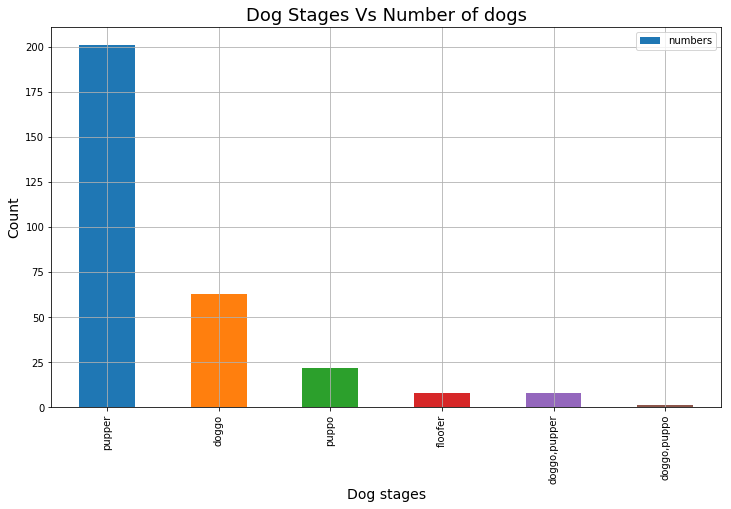

In [86]:
count_stage = count_stage.drop(0) #remove the observations without any stages
count_stage.plot(kind='bar',x='stage',y='numbers',figsize=(12, 7))
plt.ylabel('Count',fontsize=14)
plt.xlabel('Dog stages',fontsize=14)
plt.title('Dog Stages Vs Number of dogs',fontsize=18)
plt.grid(True)
plt.show()

#### Analysis of favourite_count and retweets according to dog stages

We plot a boxplot to show the favourite_count and retweets according to the different dog stages

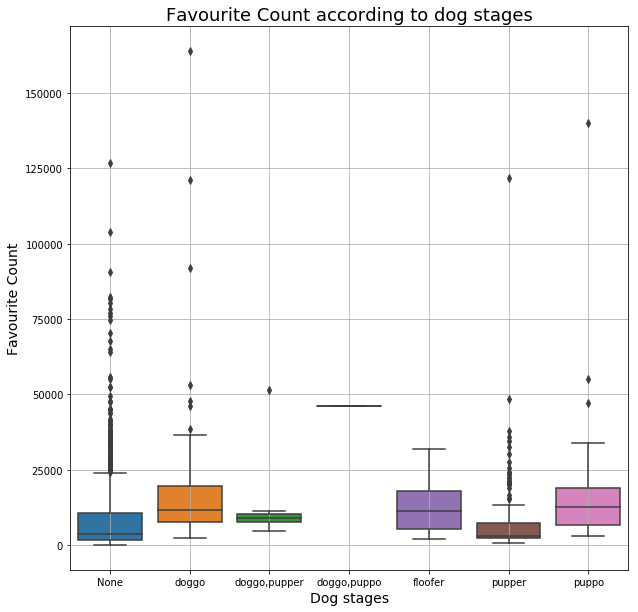

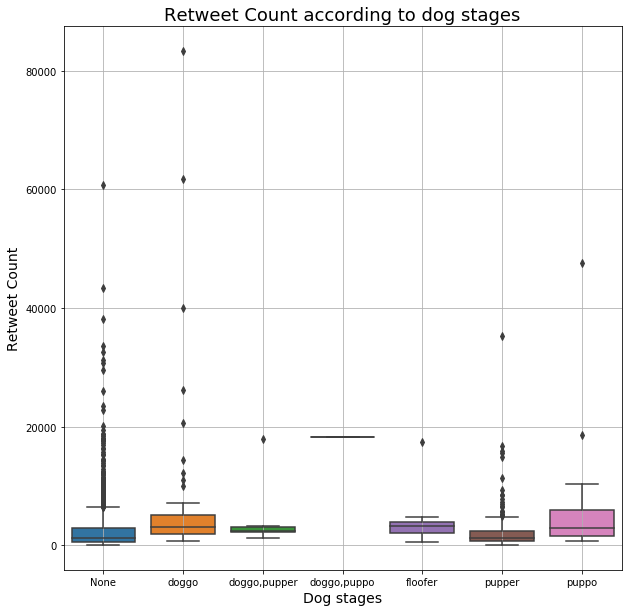

In [87]:
fig1=sns.boxplot(x=df_final.stage, y=df_final.favorite_count)
plt.gcf().set_size_inches(10,10)
plt.ylabel('Favourite Count',fontsize=14)
plt.xlabel('Dog stages',fontsize=14)
plt.title('Favourite Count according to dog stages',fontsize=18)
plt.grid(True)
plt.show()
fig2=sns.boxplot(x=df_final.stage, y=df_final.retweet_count)
plt.gcf().set_size_inches(10, 10)
plt.ylabel('Retweet Count',fontsize=14)
plt.xlabel('Dog stages',fontsize=14)
plt.title('Retweet Count according to dog stages',fontsize=18)
plt.grid(True)
plt.show()

Thus it appears that although the puppers have the highest population, their average favourite_counts and retweet_counts are lower compared to the other stage groups.  The average number of retweets for floofers are the highest, whereas for average favourite count, puppos and floofers lead the rankings.

#### Favourite Count and Retweet Count

We will analyse the relation between the favourite_count and the retweet_count by plotting a scatterplot. We will then validate our findings by calculating the correlation coefficient.

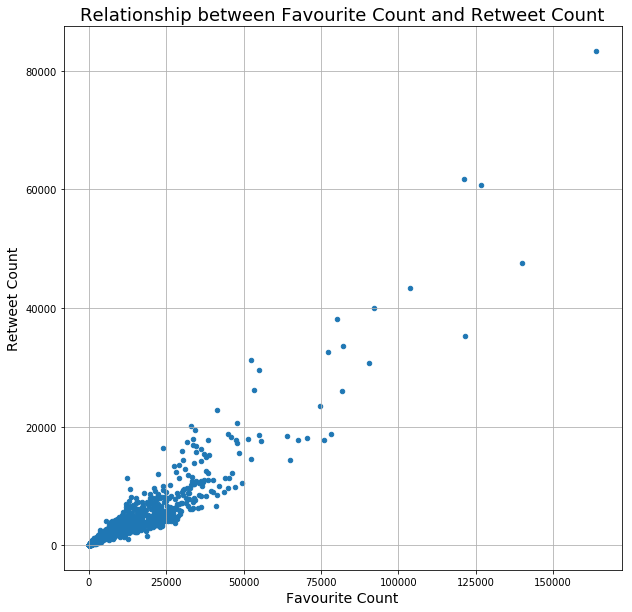

Correlation_coefficient between favorite_count and retweet_count is 0.9296357865320213


In [88]:
df_final.plot(kind='scatter',x='favorite_count',y='retweet_count',figsize=(10,10));
plt.ylabel('Retweet Count',fontsize=14);
plt.xlabel('Favourite Count',fontsize=14);
plt.title('Relationship between Favourite Count and Retweet Count',fontsize=18);
plt.grid(True)
plt.show()
correlation_coefficient = df_final['favorite_count'].corr(df_final['retweet_count'])
print('Correlation_coefficient between favorite_count and retweet_count is {}'.format(correlation_coefficient) )

From the above scatterplot we can observe that there is a strong positive correlation between the favorite_count and the retweet_count. Thus the tweets with higher favourite count also have a higher retweet count, and vice versa. This is further validated by the value of Correlation coefficient which is found to be **0.93**

#### Find the dog with the highest rating

From the statistical summary table, the highest rating is found to be 1776.

In [89]:
df_final[df_final['rating_numerator']==1776]

,tweet_id,tweet_date,tweet_time,name,stage,retweet_count,favorite_count,rating_numerator,rating_denominator,source,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text
796,749981277374128128,2016-07-04,15:00:45,Atticus,None,2623,5364,1776,10,TweetDeck,...,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


In [90]:
url_highest = df_final[df_final['rating_numerator']==1776]['jpg_url']
url_highest

796    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [91]:
#import necessary libraries for displaying our images
import requests
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageDraw

In [92]:
# Function to return the image for a given URL
def display_images(myurl):
    name='dog_image.png'
    dog_image = requests.get(myurl)
    with open(name,'wb') as image_file:
       image_file.write(dog_image.content)
    img = Image.open("dog_image.png")
    draw = ImageDraw.Draw(img)

    return img

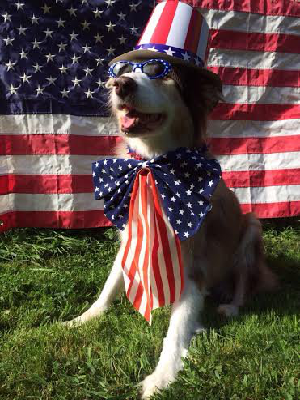

In [93]:
#display the image of the highest rated dog named Atticus
img=display_images('https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')
img = img.resize((300,400))
img.save('sample-out.png')
IPythonImage(filename='sample-out.png')

#### Find the dog with the lowest rating

From the table, the lowest rating is found to be 0

In [94]:
df_final[df_final['rating_numerator']==0]

,tweet_id,tweet_date,tweet_time,name,stage,retweet_count,favorite_count,rating_numerator,rating_denominator,source,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text
245,835152434251116546,2017-02-24,15:40:31,Not known,None,3232,23532,0,10,Twitter for iPhone,...,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag


In [95]:
url_lowest = df_final[df_final['rating_numerator']==0]['jpg_url']
url_lowest

245    https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
Name: jpg_url, dtype: object

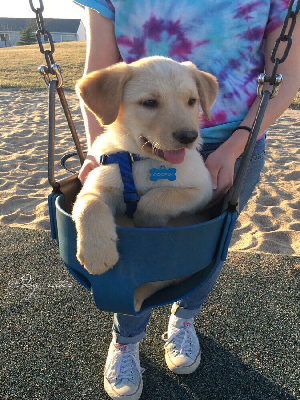

In [96]:
#display the image of the lowest rated dog
img=display_images('https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg')
img = img.resize((300,400))
img.save('sample-out.png')
IPythonImage(filename='sample-out.png')

#### Find the dog with the highest favourite count

From the statistical summary table, the highest favourite count is found to be 163917.

In [98]:
df_final[df_final['favorite_count']==163892]

,tweet_id,tweet_date,tweet_time,name,stage,retweet_count,favorite_count,rating_numerator,rating_denominator,source,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text
845,744234799360020481,2016-06-18,18:26:18,Not known,doggo,83352,163892,13,10,Twitter for iPhone,...,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


In [99]:
url_favorite = df_final[df_final['favorite_count']==163892]['jpg_url']
url_favorite

845    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

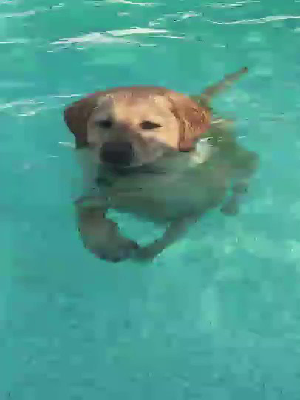

In [100]:
#display the image of the dog with highest favorite count
img=display_images('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')
img = img.resize((300,400))
img.save('sample-out.png')
IPythonImage(filename='sample-out.png')

#### Find the dog with the highest retweet count

From the same table, the highest retweet count is found to be 83377.

In [101]:
url_retweet = df_final[df_final['retweet_count']==83352]['jpg_url']
url_retweet

845    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

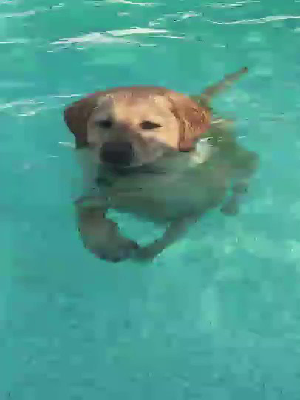

In [103]:
#display the image of the dog with highest retweet count
img=display_images('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')
img = img.resize((300,400))
img.save('sample-out.png')
IPythonImage(filename='sample-out.png')

This 'doggo' with a video image has the highest favourite count and is also found to have the highest number of retweets. We had earlier found that favourite count and retweet count have a high correlation between them.

#### Resources:

https://stackoverflow.com/questions/47925828/how-to-create-a-pandas-dataframe-using-tweepy

https://stackoverflow.com/questions/46554920/tweepy-error-144-when-populating-a-pandas-dataframe-column-with-tweet-strings

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

https://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file

https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pythons-pandas

https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas

https://stackoverflow.com/questions/43801642/how-to-replace-different-strings-with-different-values-pretty-in-a-column-of-dat

https://chrisalbon.com/python/basics/strings_to_datetime/

https://stackoverflow.com/questions/466345/converting-string-into-datetime

https://stackoverflow.com/questions/46308753/python-pandas-split-string-into-date-and-time-in-datetime-format

https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe

https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook

https://pillow.readthedocs.io/en/3.1.x/reference/Image.html

https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr